<a href="https://colab.research.google.com/github/siliconemonster/IA-2020.1/blob/main/AlineLarissa_ArvoreDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Árvore de Decisão

Inicialmente são carregadas as bibliotecas necessárias: 

+ pandas (https://pandas.pydata.org/): biblioteca para análise de dados em python
+ scikit-learn (https://scikit-learn.org/stable/): biblioteca de ferramentas de aprendizagem de máquina em python
+ Base do Kagle: https://www.kaggle.com/heptapod/titanic



In [1]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import numpy as np
from sklearn.model_selection import KFold

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def defineConceito(dataset):
  # definir o conceito alvo e as features usadas

  feature_cols = ['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked'] # features (atributos) que serão usadas no aprendizado

  X = dataset[feature_cols] # selecionamos as colunas correspondentes aos atributos que serão usados
  y = dataset.survived # conceito que queremos aprender. Selecionamos a coluna com a classificação das instâncias

  return X, y

Vamos criar agora o nosso classificador de árvore de decisão, usando como função para seleção do atributo a entropia:

In [4]:
def separaTeste(clf, Xone_hot_data, y, tam_teste):

  X_train, X_test, Y_train, Y_test = train_test_split(Xone_hot_data, y, test_size=tam_teste, shuffle=False)
  #print("Treino:")
  #display(Y_train.to_frame())
  #print("Teste:")
  #display(Y_test.to_frame())

  return X_train, X_test, Y_train, Y_test


Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

In [5]:
def plotaArvore(clf, Xone_hot_data):
  # tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
  # pois o one-hot acrescenta mais
  dot_data = StringIO()
  export_graphviz(clf, out_file=dot_data,  
                  filled=True, rounded=True,
                  special_characters=True,feature_names = Xone_hot_data.columns,class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
  graph.write_png('arvore1.png')
  arvore = graph.create_png()

  return arvore 
  

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente. Observe que usamos todas as instâncias disponíveis no treinamento. A acurácia obtida foi 1, indicando que classificamos corretamente todos os exemplos de nosso conjunto.

In [6]:
def calculaAcuracia(X_test, Y_test, clf):
  # Usando modelo para classificar os dados que temos a disposição
  y_pred = clf.predict(X_test)
  # Medida de acuracia, que indica quantas instâncias são corretamente classificadas
  acuracia = metrics.accuracy_score(Y_test, y_pred)

  return acuracia



In [7]:
def calculaMediaAcuracias(acuracias):
  soma = sum(acuracias)
  media = soma/len(acuracias)

  return media

def fazKfold(num_folds, Xone_hot_data, clf, y):
  kf = KFold(n_splits=num_folds, shuffle=False)
  Xone_array = Xone_hot_data.to_numpy()
  acuracias = []
  for train_index, test_index in kf.split(Xone_array):
    X_train, X_test = Xone_array[train_index], Xone_array[test_index]
    #print(X_train)
    #print(X_test)
    Y_train, Y_test = y[train_index], y[test_index]
    #print(Y_train)
    #print(Y_test)
    clf = clf.fit(X_train, Y_train)
    acuracias.append(calculaAcuracia(X_test, Y_test, clf))

  media_kFold = calculaMediaAcuracias(acuracias)

  return media_kFold

In [8]:
#---- main -----
def main(criterio, tam_teste, num_folds):
  # carregando a base de dados a ser usada
  dataset = pd.read_excel("/content/drive/MyDrive/Trab_aprendizado/Trab_Titanic/titanic_survive.xlsx")
  #display(dataset)
  X, y = defineConceito(dataset)

  # "pd.get_dummies" que converte os atributos categóricos em atributos com valores 0 e 1
  Xone_hot_data = pd.get_dummies(X[['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']]) 
  clf = DecisionTreeClassifier(criterion=criterio)

  ## SEM O K FOLD ##
  X_train, X_test, Y_train, Y_test = separaTeste(clf, Xone_hot_data, y, tam_teste)
  clf = clf.fit(X_train, Y_train)
  arvore = plotaArvore(clf, Xone_hot_data)
  acuracia = calculaAcuracia(X_test, Y_test, clf)
  
  ## COM O K FOLD ##
  media_kFold = fazKfold(num_folds, Xone_hot_data, clf, y)
    

  return arvore, acuracia, media_kFold

Acuracia com criterio: entropy foi de 1.0
Média da acurácia com K_folds: 0.8314285714285714 tendo 200 de folds


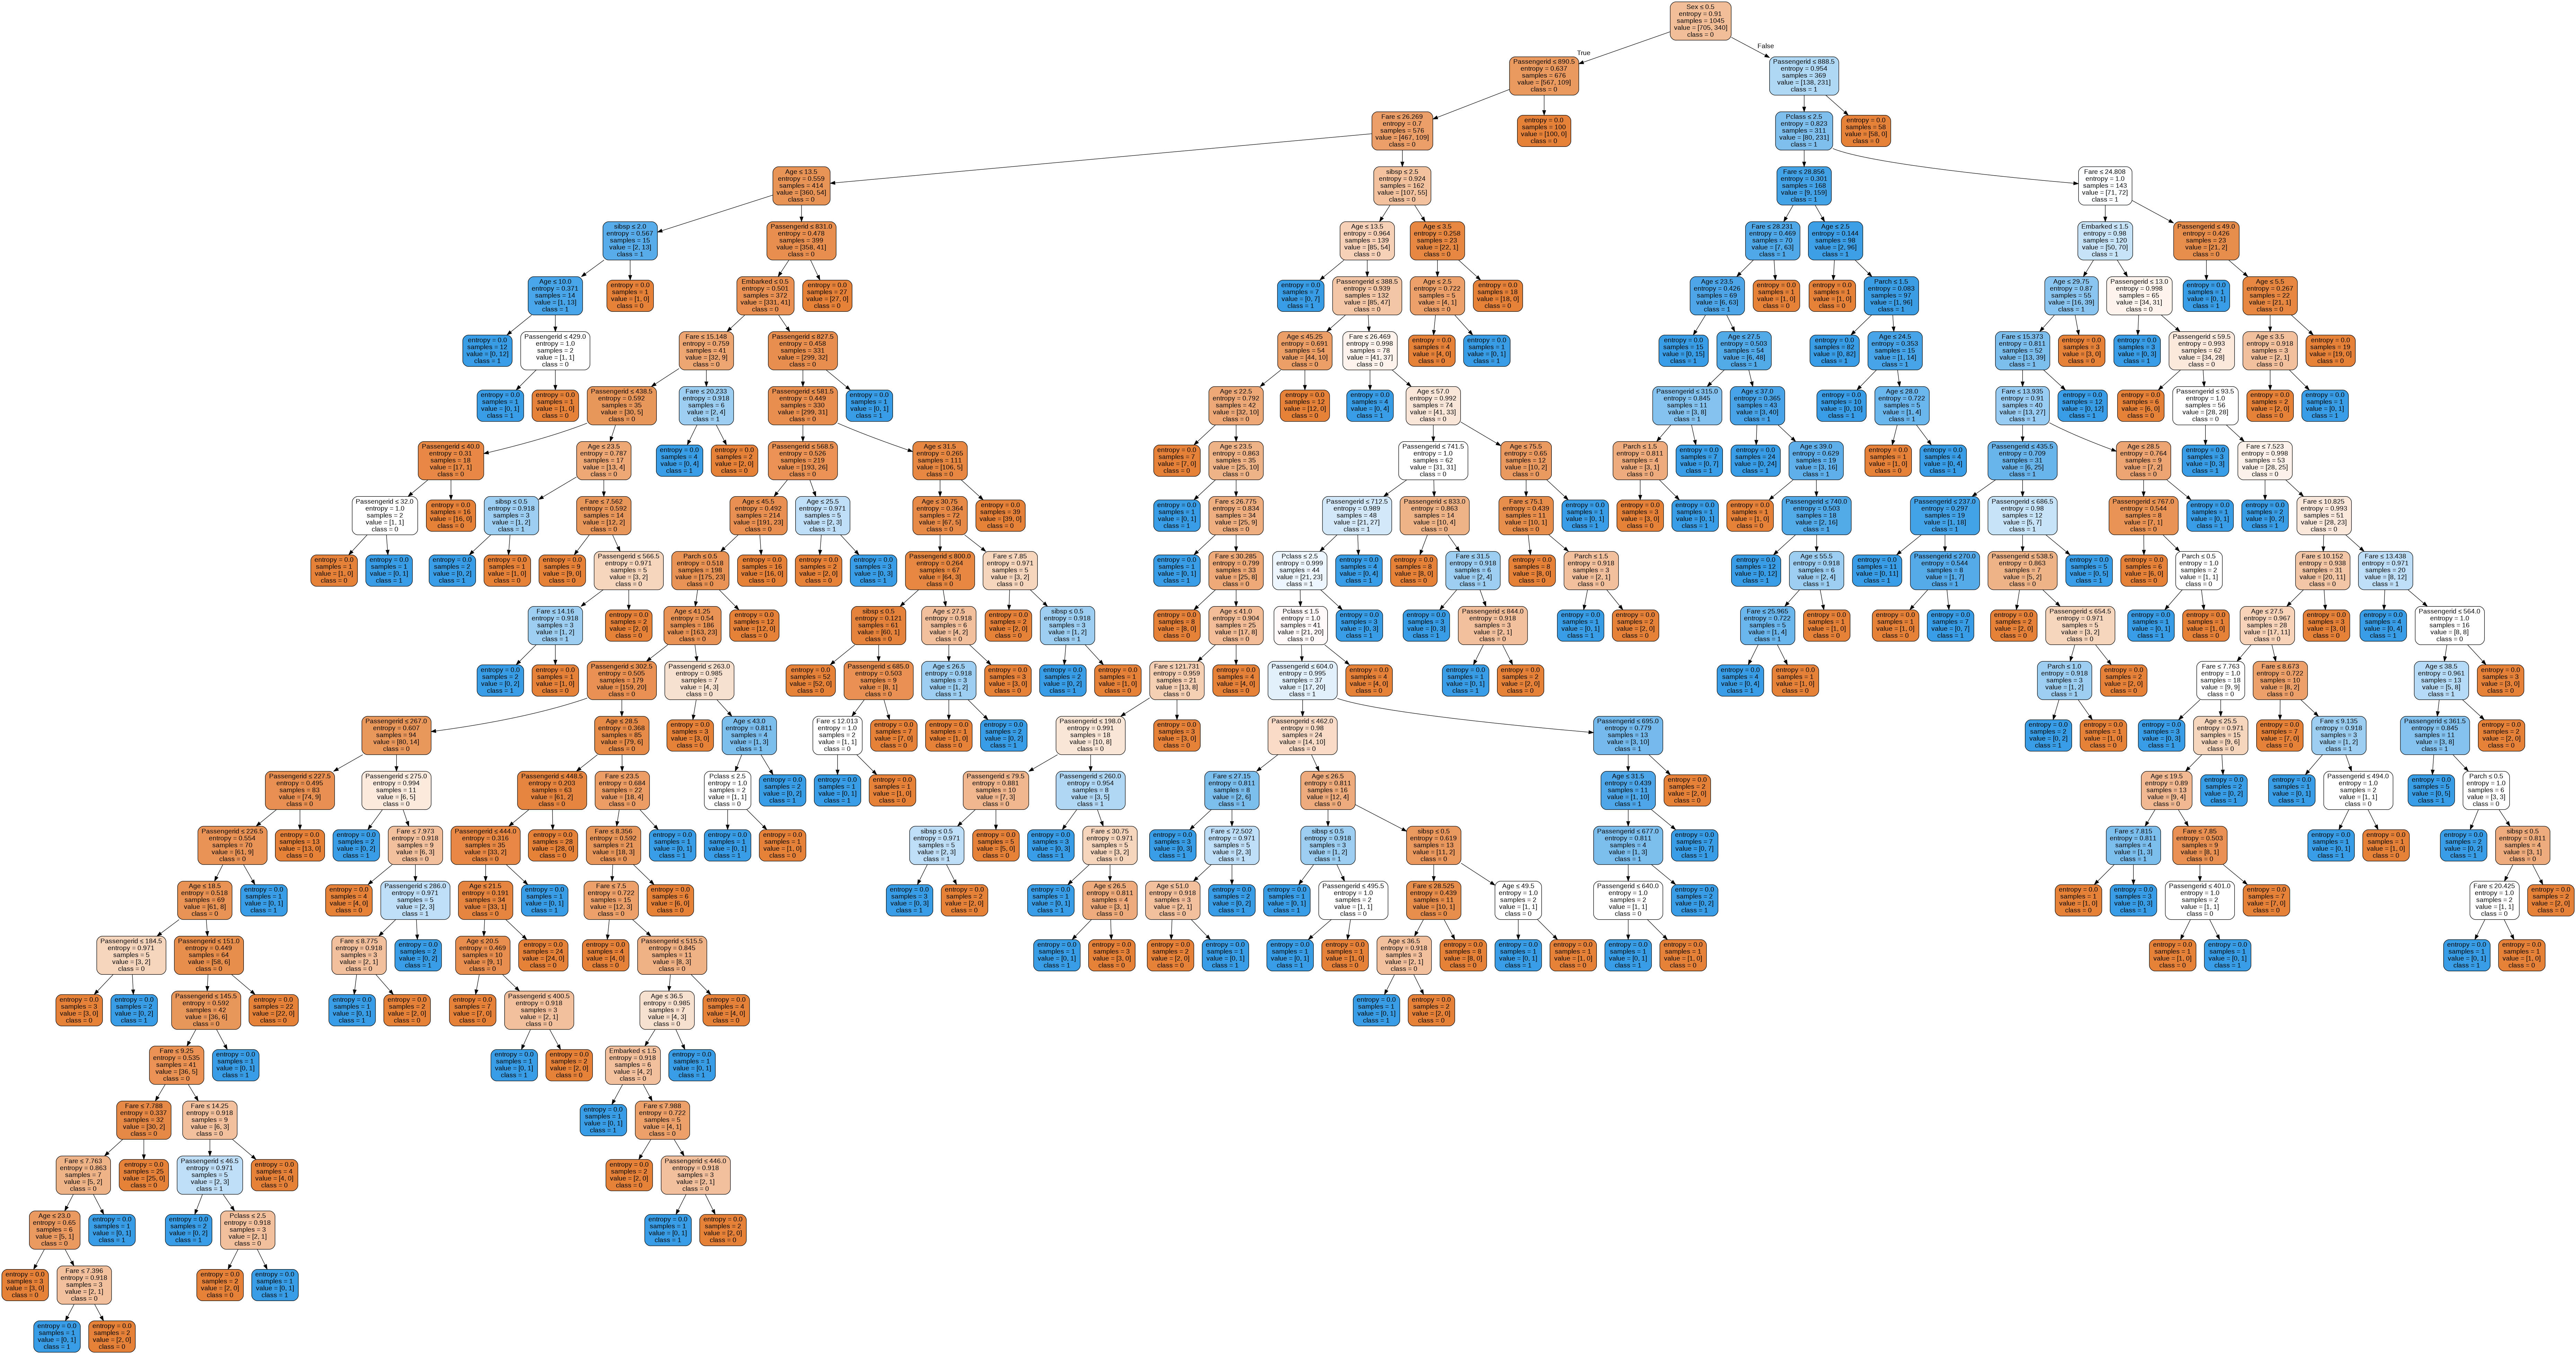

In [9]:
#chamada
criterio = 'entropy'
tam_teste = 0.2
num_folds = 200

arvore, acuracia, media_kfold = main(criterio, tam_teste, num_folds)
print("Acuracia com criterio:", criterio, "foi de", acuracia)
print("Média da acurácia com K_folds:", media_kfold , "tendo", num_folds, "de folds")
Image(arvore)
